In [1]:
!wget --no-check-certificate \
   https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-31 07:09:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 74.125.23.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  58.6MB/s    in 2.4s    

2020-08-31 07:09:45 (58.6 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
-O /tmp/validation-horse-or-human.zip

--2020-08-31 07:09:45--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-08-31 07:09:45 (106 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os
import zipfile
local_zip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip='/tmp/validation-horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [4]:
pip install -q keras

In [5]:
train_horses_dir=os.path.join('/tmp/horse-or-human/horses')
train_humans_dir=os.path.join('/tmp/horse-or-human/humans')
valid_horses_dir=os.path.join('/tmp/validation-horse-or-human/horses')
valid_humans_dir=os.path.join('/tmp/validation-horse-or-human/humans')

In [7]:
train_horses_names = os.listdir(train_horses_dir)
print(train_horses_names[:10])

train_humans_names = os.listdir(train_humans_dir)
print(train_humans_names[:10])

valid_horses_names=os.listdir(valid_horses_dir)
print(valid_horses_names[:10])

valid_humans_name=os.listdir(valid_humans_dir)
print(valid_humans_name[:10])

['horse24-8.png', 'horse42-8.png', 'horse37-2.png', 'horse31-2.png', 'horse26-8.png', 'horse41-4.png', 'horse25-0.png', 'horse40-3.png', 'horse37-1.png', 'horse18-9.png']
['human13-20.png', 'human06-29.png', 'human02-30.png', 'human10-30.png', 'human14-03.png', 'human02-16.png', 'human05-13.png', 'human11-14.png', 'human07-22.png', 'human17-12.png']
['horse2-069.png', 'horse6-544.png', 'horse3-498.png', 'horse6-218.png', 'horse5-589.png', 'horse4-403.png', 'horse3-255.png', 'horse5-065.png', 'horse6-153.png', 'horse1-554.png']
['valhuman02-10.png', 'valhuman01-07.png', 'valhuman03-11.png', 'valhuman01-24.png', 'valhuman02-09.png', 'valhuman05-08.png', 'valhuman05-22.png', 'valhuman04-15.png', 'valhuman03-17.png', 'valhuman05-02.png']


In [8]:
print('total train horse images:',len(train_horses_dir))
print('total train human images:',len(train_humans_dir))
print('total valid horse images:',len(valid_horses_dir))
print('totol valid human images:',len(valid_humans_dir))

total train horse images: 26
total train human images: 26
total valid horse images: 37
totol valid human images: 37


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ncols=4
nrows=4
pic_index=0

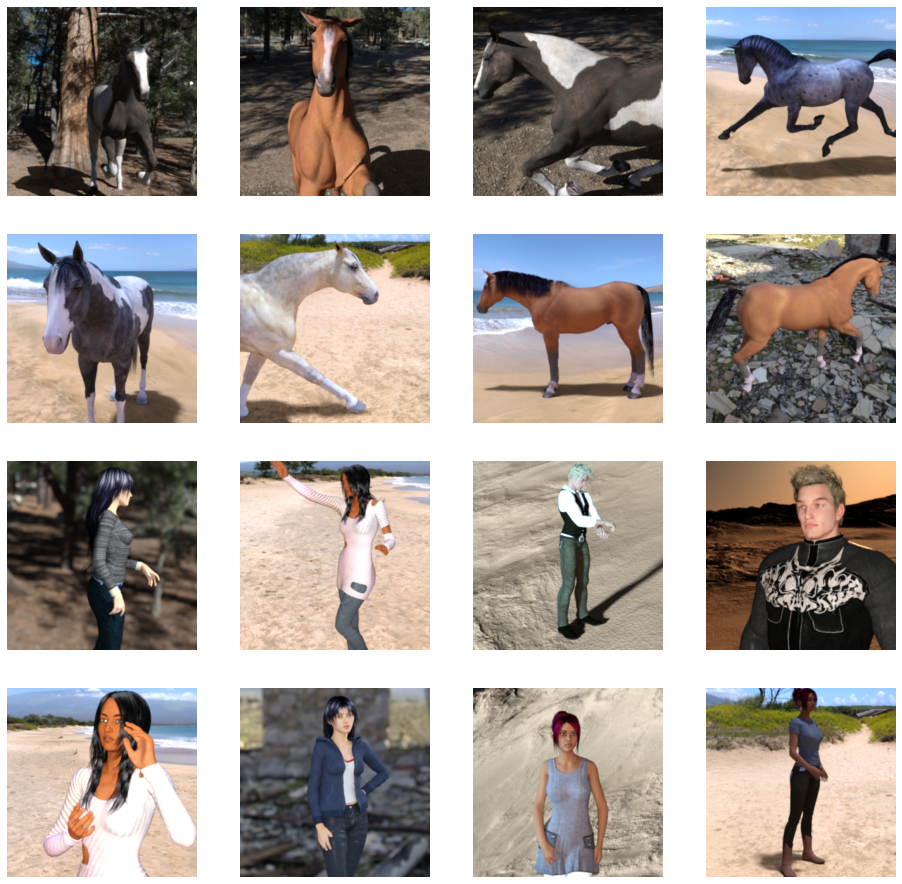

In [29]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
pic_index+=8
next_horse_pics=[os.path.join(train_horses_dir,fname)
                for fname in train_horses_names[pic_index-8:pic_index]]
next_human_pics=[os.path.join(train_humans_dir,fname)
                for fname in train_humans_names[pic_index-8:pic_index]]
                 
for i, img_path in enumerate(next_horse_pics+next_human_pics):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [30]:
import tensorflow as tf

In [31]:
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

In [33]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
                                metrics=['acc'])
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',  
        target_size=(300, 300),  
        batch_size=128,
        class_mode='binary')
valid_datagen=ImageDataGenerator(rescale=1/255)
valid_generator=valid_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [34]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=8,
                            epochs=12,
                            verbose=1,
                            validation_data=valid_generator,
                            validation_steps=8)

Epoch 1/12
8/8 [==============================] - 7s 922ms/step - loss: 1.1909 - acc: 0.4839 - val_loss: 0.7017 - val_acc: 0.5000
Epoch 2/12
8/8 [==============================] - 8s 983ms/step - loss: 0.6782 - acc: 0.6084 - val_loss: 0.4884 - val_acc: 0.8398
Epoch 3/12
8/8 [==============================] - 8s 979ms/step - loss: 0.6471 - acc: 0.6758 - val_loss: 0.3750 - val_acc: 0.8711
Epoch 4/12
8/8 [==============================] - 8s 978ms/step - loss: 0.6834 - acc: 0.6484 - val_loss: 0.3977 - val_acc: 0.8594
Epoch 5/12
8/8 [==============================] - 7s 937ms/step - loss: 0.3568 - acc: 0.8587 - val_loss: 0.6788 - val_acc: 0.8477
Epoch 6/12
8/8 [==============================] - 8s 977ms/step - loss: 0.1962 - acc: 0.9219 - val_loss: 1.3589 - val_acc: 0.7383
Epoch 7/12
8/8 [==============================] - 8s 938ms/step - loss: 0.9611 - acc: 0.8432 - val_loss: 0.8659 - val_acc: 0.6250
Epoch 8/12
8/8 [==============================] - 7s 935ms/step - loss: 0.4933 - acc: 0.86

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [37]:
uploaded=files.upload()

Saving girls-462072_1920.jpg to girls-462072_1920.jpg


In [38]:
for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

[1.]
girls-462072_1920.jpg is a human


In [41]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving white-horse-3010129_1920.jpg to white-horse-3010129_1920.jpg
[0.]
white-horse-3010129_1920.jpg is a horse
